### International Gang

Members:   

          Aram Shojaei

          Ahmed Shahhat
          
          Nguyen Xuan Tung
          
          Pu Yin
    

### First set of exercise

In [1]:
import math
import numpy as np
import time
#Make plots static
%matplotlib inline

#Make 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
#from itertools import zip_longest

from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

We using the function: 
$$ k = b*[1-exp(-\frac{1}{2}*w*(x^2+y^2)] + \frac{1}{2}*q*(-x^3+y)^2 $$
with the gradient of the function:
component x: $$grad_x = b*exp(-\frac{1}{2}(x^2+y^2)*w*x - 3*q*x^2(-x^3+y)$$
component y: $$grad_y = b*exp(-\frac{1}{2}(x^2+y^2)*w*y + q*(-x^3+y)$$
where parameters: 
* $q=0.1$
* $w=10$
* $b=20$

In [2]:
#Function
q=1/10
w=10
b=20
 
def f(x,y):
    k= b*(1-np.exp(-0.5*w*(x**2+y**2))) + 0.5*q*(-x**3+y)**2
    return k 
          
def  grad(params):
    
    x=params[0]
    y=params[1]
     
    grx= b*math.exp(-0.5*w*(x*x+y*y))*w*x-3*q*x*x*(-x**3+y)
    gry= b*math.exp(-0.5*w*(x*x+y*y))*w*y+q*(-x**3+y)
    return [grx,gry]


In [3]:
def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-2, 2)
    
    plt.xticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    plt.yticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    ax.set_zticks([-2, -1, 0, 1, 2])
    ax.set_zticklabels(["-2", "-1", "0", "1", "2"])
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

def overlay_trajectory_quiver(ax,obj_func,trajectory, color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(xs[:-1], ys[:-1], zs[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1],zs[1:]-zs[:-1],color=color,arrow_length_ratio=0.3)
    
    return ax;

def overlay_trajectory(ax,obj_func,trajectory,label,color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.plot(xs,ys,zs, color, label=label)
    
    return ax;

    
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

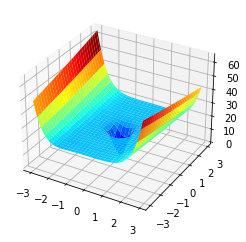

In [4]:
#define range for input
r_min, r_max = -3, 3
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
x, y = meshgrid(xaxis,yaxis)
result = f(x,y)
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x,y,result, cmap='jet')
pyplot.show()

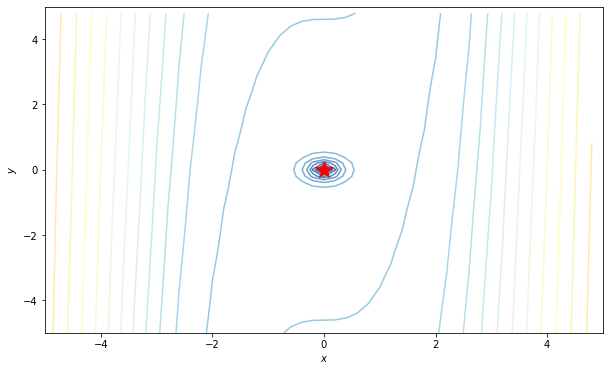

In [5]:
def contour_f():
    x, y = np.meshgrid(np.arange(-5, 5, 0.2), np.arange(-5, 5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=f(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    
    return fig,ax

x, y = np.mgrid[-1:1:31j, -1:1:31j]
fig1,ax1 =contour_f()
plt.show()

<b>Gradient Descent</b>

In this method, we will take steps in the direction of the local gradient. Given some parameters $\theta$, we adjust the parameters at each iteration so that

$$\theta_{t+1}= \theta_t - \eta_t \nabla_\theta E(\theta),$$

The learning rate $\eta_t$ that controls how large a step we take. In general, the algorithm is extremely sensitive to the choice of $\eta_t$. If $\eta_t$ is too large, then one can wildly oscillate around minima and miss important structure at small scales. This problem is amplified if our gradient computations are noisy and inexact (as is often the case in machine learning applications). If $\eta_t$ is too small, then the learning/minimization procedure becomes extremely slow.

In [6]:
def gd(grad, init, n_epochs=1000, eta=10**-4):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        v=eta*(np.array(grad(params)))
        params=params-v
        param_traj[j+1,]=params
    return param_traj

init1=[3,3]
eta1=0.1
gd(grad,init1, n_epochs=100, eta=eta1)

<ipython-input-2-49b55da9eb69>:15: RuntimeWarning: overflow encountered in double_scalars
  grx= b*math.exp(-0.5*w*(x*x+y*y))*w*x-3*q*x*x*(-x**3+y)
<ipython-input-2-49b55da9eb69>:15: RuntimeWarning: invalid value encountered in double_scalars
  grx= b*math.exp(-0.5*w*(x*x+y*y))*w*x-3*q*x*x*(-x**3+y)
<ipython-input-2-49b55da9eb69>:16: RuntimeWarning: overflow encountered in double_scalars
  gry= b*math.exp(-0.5*w*(x*x+y*y))*w*y+q*(-x**3+y)


array([[ 3.00000000e+000,  3.00000000e+000],
       [-3.48000000e+000,  3.24000000e+000],
       [ 1.30086216e+001,  2.78615808e+000],
       [-1.11486219e+004,  2.47720368e+001],
       [ 5.16686591e+018, -1.38568195e+010],
       [-1.10473270e+092,  1.37937253e+054],
       [             inf, -1.34825373e+274],
       [             nan,              inf],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [  

<b>Gradient Descent with Momentum</b>
One problem with gradient descent is that it has no memory of where the "ball rolling down the hill" comes from. This can be an issue when there are many shallow minima in our landscape. If we make an analogy with a ball rolling down a hill, the lack of memory is equivalent to having no inertia or momentum (i.e. completely overdamped dynamics). Without momentum, the ball has no kinetic energy and cannot climb out of shallow minima. 

Momentum becomes especially important when we start thinking about stochastic gradient descent with noisy, stochastic estimates of the gradient. In this case, we should remember where we were coming from and not react drastically to each new update.



Inspired by this, we can add a memory or momentum term to the stochastic gradient descent term above:

$$
v_{t}=\gamma v_{t-1}+\eta_{t}\nabla_\theta E(\theta_t),\\
\theta_{t+1}= \theta_t -v_{t},
$$

with $0\le \gamma < 1$ called the momentum parameter. When $\gamma=0$, this reduces to ordinary gradient descent, and increasing $\gamma$ increases the inertial contribution to the gradient. From the equations above, we can see that typical memory lifetimes of the gradient is given by $(1-\gamma)^{-1}$. For $\gamma=0$ as in gradient descent, the lifetime is just one step. For $\gamma=0.9$, we typically remember a gradient for ten steps. We will call this gradient descent with classical momentum or CM for short.




In [7]:
def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        v=gamma*v+eta*(np.array(grad(params)))
        params=params-v
        param_traj[j+1,]=params
    return param_traj
lr_l=10**-3
lr_s=10**-6
Nsteps=10**4
gd_with_mom(grad,init1,Nsteps,eta=lr_s, gamma=0.9)

array([[3.        , 3.        ],
       [2.9999352 , 3.0000024 ],
       [2.99981209, 3.00000696],
       ...,
       [1.81946696, 3.07198854],
       [1.81943761, 3.07199149],
       [1.81940827, 3.07199444]])

<b>NAG (Nesterov acceleration gradient)</b>
A final widely used variant of gradient descent with momentum is called the Nesterov accelerated gradient (NAG). In NAG, rather than calculating the gradient at the current position, one calculates the gradient at the position momentum will carry us to at time $t+1$, namely, $\theta_t -\gamma v_{t-1}$. Thus, the update becomes:

$$
v_{t}=\gamma v_{t-1}+\eta_{t}\nabla_\theta E(\theta_t-\gamma v_{t-1})\\
\theta_{t+1}= \theta_t -v_{t}
$$



In [8]:
def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov)))
        params=params-v
        param_traj[j+1,]=params
    return param_traj
lr_l=10**-3
lr_s=10**-6
Nsteps=10**4
NAG(grad,init1,Nsteps,eta=lr_s, gamma=0.9)

array([[3.        , 3.        ],
       [2.9999352 , 3.0000024 ],
       [2.99981209, 3.00000696],
       ...,
       [1.81954954, 3.07199013],
       [1.81952019, 3.07199309],
       [1.81949084, 3.07199604]])

<b>RMS prop (Root-Mean-Square propagation)</b>

To keeping a running average of the first moment of the gradient, we also keep track of the second moment through a moving average. The update rule for RMS prop is given by
$$
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) \\
\mathbf{s}_t =\beta \mathbf{s}_{t-1} +(1-\beta)\mathbf{g}_t^2 \nonumber \\
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t + \eta_t { \mathbf{g}_t \over \sqrt{\mathbf{s}_t +\epsilon}}, \nonumber \\
$$
where $\beta$ controls the averaging time of the second moment and is typically taken to be about $\beta=0.9$, $\eta_t$ is a learning rate typically chosen to be $10^{-3}$, and $\epsilon\sim 10^{-8}$ is a small regularization constant to prevent divergences. It is clear from this formula that the learning rate is reduced in directions where the norm of the gradient is consistently large. This greatly speeds up the convergence by allowing us to use a larger learning rate for flat directions.

In [9]:
def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0;
    for j in range(n_epochs):
        g=np.array(grad(params))
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
lr_l=10**-3
lr_s=10**-6
Nsteps=10**4
rms_prop(grad,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8)

array([[3.        , 3.        ],
       [2.99683772, 3.00316228],
       [2.99454988, 3.00545242],
       ...,
       [1.6356212 , 4.3712121 ],
       [1.63462153, 4.37218775],
       [1.63562108, 4.37121109]])

<b>ADAM</b>

We keep a running average of both the first and second moment of the gradient and use this information to adaptively change the learning rate for different parameters. In addition to keeping a running average of the first and second moments of the gradient, ADAM performs an additional bias correction to account for the fact that we are estimating the first two moments of the gradient using a running average (denoted by the hats in the update rule below). The update rule for ADAM is given by (where multiplication and division are understood to be element wise operations)
$$
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) \\
\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t \nonumber \\
\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2 \nonumber \\
\hat{\mathbf{m}}_t={\mathbf{m}_t \over 1-\beta_1} \nonumber \\
\hat{\mathbf{s}}_t ={\mathbf{s}_t \over1-\beta_2} \nonumber \\
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t + \eta_t { \hat{\mathbf{m}}_t \over \sqrt{\hat{\mathbf{s}}_t +\epsilon}}, \nonumber 
$$
where $\beta_1$ and $\beta_2$ set the memory lifetime of the first and second moment and are typically take to be $0.9$ and $0.99$ respectively, and $\eta$ and $\epsilon$ are identical
to RMSprop.


In [10]:
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        g=np.array(grad(params))
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj
adams(grad,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8)

array([[3.        , 3.        ],
       [2.999     , 3.001     ],
       [2.99765319, 3.00234684],
       ...,
       [1.64844213, 4.47941312],
       [1.64844213, 4.47941312],
       [1.64844213, 4.47941312]])

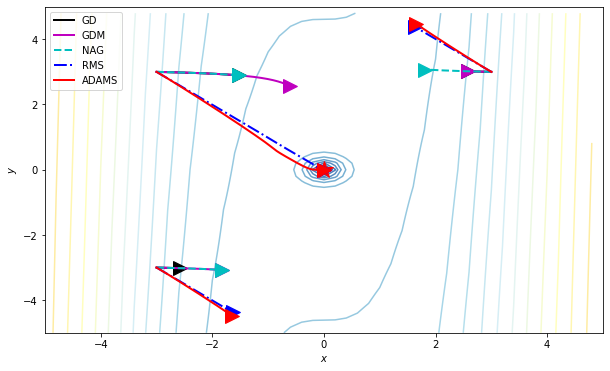

In [11]:
plt.close()
init1=np.array([3,3])
fig1, ax1=contour_f()

gd_trajectory1=gd(grad,init1,Nsteps, eta=lr_s)
gdm_trajectory1=gd_with_mom(grad,init1,Nsteps,eta=lr_s, gamma=0.9)
NAG_trajectory1=NAG(grad,init1,Nsteps,eta=lr_s, gamma=0.9)
rms_prop_trajectory1=rms_prop(grad,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8)
adam_trajectory1=adams(grad,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8)

overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory1, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')

plt.legend(loc=2)

#init2=np.array([1.5,1.5])
#gd_trajectory2=gd(grad_beales_function,init2,Nsteps, eta=10**-6, noise_strength=0)
#gdm_trajectory2=gd_with_mom(grad_beales_function,init2,Nsteps,eta=10**-6, gamma=0.9,noise_strength=0)
#NAG_trajectory2=NAG(grad_beales_function,init2,Nsteps,eta=10**-6, gamma=0.9,noise_strength=0)
#rms_prop_trajectory2=rms_prop(grad_beales_function,init2,Nsteps,eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0)
#adam_trajectory2=adams(grad_beales_function,init2,Nsteps,eta=10**-3, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)
#overlay_trajectory_contour_M(ax1,gdm_trajectory2, 'GDM','m')
#overlay_trajectory_contour_M(ax1,NAG_trajectory2, 'NAG','c--')
#overlay_trajectory_contour_M(ax1,rms_prop_trajectory2,'RMS', 'b-.')
#overlay_trajectory_contour_M(ax1,adam_trajectory2,'ADAMS', 'r')

init3=np.array([-3,3])

gd_trajectory3=gd(grad,init3,10**5, eta=lr_s)
gdm_trajectory3=gd_with_mom(grad,init3,10**5,eta=lr_s, gamma=0.9)
NAG_trajectory3=NAG(grad,init3,Nsteps,eta=lr_s, gamma=0.9)
rms_prop_trajectory3=rms_prop(grad,init3,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8)
adam_trajectory3=adams(grad,init3,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8)

overlay_trajectory_contour_M(ax1,gd_trajectory3, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory3, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory3, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory3,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory3,'ADAMS', 'r')

init4=np.array([-3,-3])

gd_trajectory4=gd(grad,init4,Nsteps, eta=lr_s)
gdm_trajectory4=gd_with_mom(grad,init4,Nsteps,eta=lr_s, gamma=0.9)
NAG_trajectory4=NAG(grad,init4,Nsteps,eta=lr_s, gamma=0.9)
rms_prop_trajectory4=rms_prop(grad,init4,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8)
adam_trajectory4=adams(grad,init4,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8)

overlay_trajectory_contour_M(ax1,gd_trajectory4, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory4, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory4, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory4,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory4,'ADAMS', 'r')

plt.show()

In [12]:
k= np.arange(-3,3)
t1=[]
z1=[]
for i in range (len(k)):
    for j in range (len(k)):
        start=time.time()
        init=[k[i],k[j]]
        gd_1=gd(grad,init, n_epochs=100, eta=eta1)
        p = gd_1[-1]
        z= f(p[0],p[1])
        end = time.time()
        t= end - start
        t1.append(t)
        z1.append(z)

<ipython-input-2-49b55da9eb69>:15: RuntimeWarning: overflow encountered in double_scalars
  grx= b*math.exp(-0.5*w*(x*x+y*y))*w*x-3*q*x*x*(-x**3+y)
<ipython-input-2-49b55da9eb69>:15: RuntimeWarning: invalid value encountered in double_scalars
  grx= b*math.exp(-0.5*w*(x*x+y*y))*w*x-3*q*x*x*(-x**3+y)
<ipython-input-2-49b55da9eb69>:16: RuntimeWarning: overflow encountered in double_scalars
  gry= b*math.exp(-0.5*w*(x*x+y*y))*w*y+q*(-x**3+y)
<ipython-input-2-49b55da9eb69>:16: RuntimeWarning: invalid value encountered in double_scalars
  gry= b*math.exp(-0.5*w*(x*x+y*y))*w*y+q*(-x**3+y)


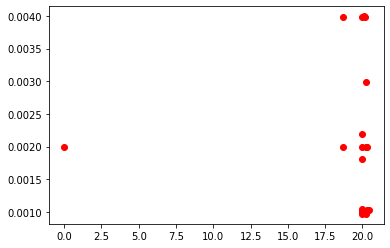

In [13]:
plt.plot(z1,t1,'ro')

In [14]:
k= np.arange(-3,3)
t2=[]
z2=[]
for i in range (len(k)):
    for j in range (len(k)):
        start=time.time()
        init=[k[i],k[j]]
        gd_2=gd_with_mom(grad,init, n_epochs=100, eta=eta1)
        p = gd_2[-1]
        z= f(p[0],p[1])
        end = time.time()
        t= end - start
        t2.append(t)
        z2.append(z)
lr_l=10**2
lr_s=10**-6

<ipython-input-2-49b55da9eb69>:15: RuntimeWarning: overflow encountered in double_scalars
  grx= b*math.exp(-0.5*w*(x*x+y*y))*w*x-3*q*x*x*(-x**3+y)
<ipython-input-2-49b55da9eb69>:16: RuntimeWarning: overflow encountered in double_scalars
  gry= b*math.exp(-0.5*w*(x*x+y*y))*w*y+q*(-x**3+y)
<ipython-input-2-49b55da9eb69>:15: RuntimeWarning: invalid value encountered in double_scalars
  grx= b*math.exp(-0.5*w*(x*x+y*y))*w*x-3*q*x*x*(-x**3+y)
<ipython-input-2-49b55da9eb69>:16: RuntimeWarning: invalid value encountered in double_scalars
  gry= b*math.exp(-0.5*w*(x*x+y*y))*w*y+q*(-x**3+y)


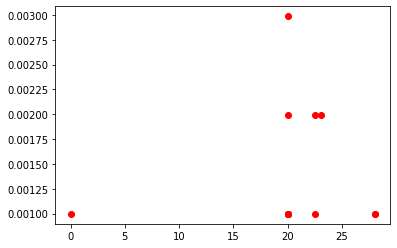

In [15]:
plt.plot(z2,t2,'ro')

We see that there are 2 miniama points 0 and 20. Changing the value of does not change the minima points. The time for the object to reach the minima point for most of the test is 0.0010s. Overall, we can conclude that RMSprob does not really matter on how small the gradients are. RMSprop scales the learning rate so the algorithms goes through saddle point faster than most. 

In [16]:
k= np.arange(-3,3)
t3=[]
z3=[]
for i in range (len(k)):
    for j in range (len(k)):
        start=time.time()
        init=[k[i],k[j]]
        gd_3=rms_prop(grad,init, n_epochs=100, eta=eta1)
        p = gd_3[-1]
        z= f(p[0],p[1])
        end = time.time()
        t= end - start
        t3.append(t)
        z3.append(z)
lr_l=10**6
lr_s=10**-6

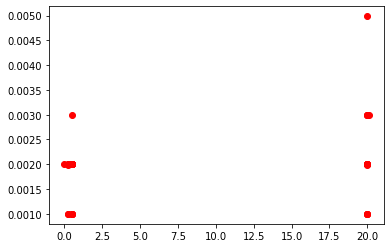

In [17]:
plt.plot(z3,t3,'ro')

In [18]:
k= np.arange(-3,3)
t4=[]
z4=[]
for i in range (len(k)):
    for j in range (len(k)):
        start=time.time()
        init=[k[i],k[j]]
        gd_4=adams(grad,init, n_epochs=100, eta=eta1)
        p = gd_4[-1]
        z= f(p[0],p[1])
        end = time.time()
        t= end - start
        t4.append(t)
        z4.append(z)
        
lr_l=10**-9
lr_s=10**6       

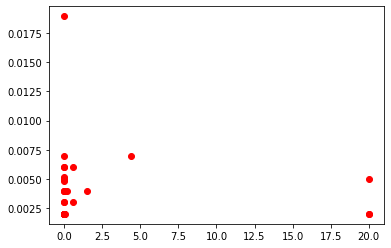

In [19]:
plt.plot(z4,t4,'ro')




Advantages:

*Can handle sparse gradients on noisy datasets.

*Works well on large datasets.

Disadvantages:

*Adam does not converge to an optimal solution in some areas (this is the motivation for AMSGrad).


In [20]:
k= np.arange(-3,3)
t5=[]
z5=[]
for i in range (len(k)):
    for j in range (len(k)):
        start=time.time()
        init=[k[i],k[j]]
        gd_5=NAG(grad,init, n_epochs=100, eta=eta1)
        p = gd_5[-1]
        z= f(p[0],p[1])
        end = time.time()
        t= end - start
        t5.append(t)
        z5.append(z)
        
        
lr_l=10**-3
lr_s=10**-6   

<ipython-input-2-49b55da9eb69>:15: RuntimeWarning: overflow encountered in double_scalars
  grx= b*math.exp(-0.5*w*(x*x+y*y))*w*x-3*q*x*x*(-x**3+y)
<ipython-input-2-49b55da9eb69>:15: RuntimeWarning: invalid value encountered in double_scalars
  grx= b*math.exp(-0.5*w*(x*x+y*y))*w*x-3*q*x*x*(-x**3+y)
<ipython-input-2-49b55da9eb69>:16: RuntimeWarning: overflow encountered in double_scalars
  gry= b*math.exp(-0.5*w*(x*x+y*y))*w*y+q*(-x**3+y)
<ipython-input-2-49b55da9eb69>:16: RuntimeWarning: invalid value encountered in double_scalars
  gry= b*math.exp(-0.5*w*(x*x+y*y))*w*y+q*(-x**3+y)


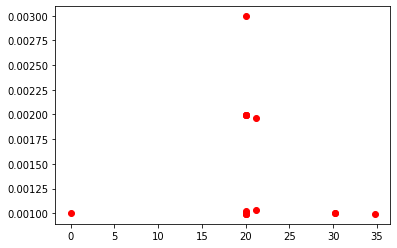

In [21]:
plt.plot(z5,t5,'ro')

##----------------------------------------------------------------------------------------------------------------------------

For the extra function, we using the function: 
$$ k_2 = 1 + \frac{1}{2}*q*(x^2+y^2) - cos[2\pi*(x*y-y^2)] $$
with the gradient of the function:
component x: $$grad_x = q*x+ 2\pi*y*sin[2\pi(x*y-y^2)]$$
component y: $$grad_y = q*y+2\pi*(x-2*y)*sin[2\pi*(x*y-y^2)]$$
where parameters: 
* $q=6$

In [22]:
#Extra function
q=10

def f_2(x, y):
    k_2 = 1 + 0.5*q*(x**2+y**2) - np.cos(2*np.pi*(x*y-y**2))
    return k_2

def grad_f_2(params, q= 10):
    x=params[0]
    y=params[1]
    grad_x= q*x + 2*y*np.pi*np.sin(2*np.pi*(x*y-y**2))
    grad_y= q*y + 2*np.pi*(x-2*y)*np.sin(2*np.pi*(x*y-y**2))
    return [grad_x,grad_y]

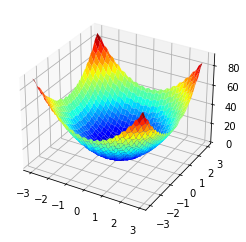

In [23]:
r_min, r_max = -3, 3
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
x, y = meshgrid(xaxis,yaxis)
result = f_2(x,y)
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x,y,result, cmap='jet')
pyplot.show()

<ipython-input-24-62720016536b>:5: UserWarning: Log scale: values of z <= 0 have been masked
  cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")


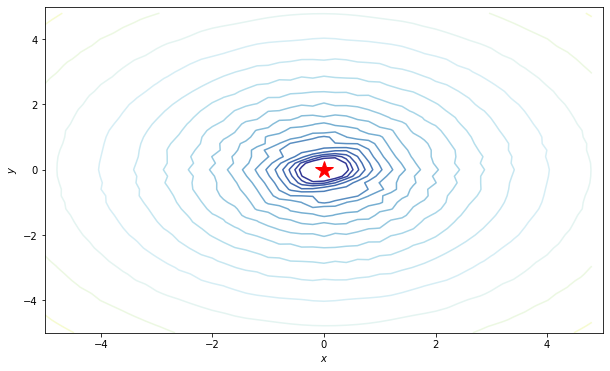

In [24]:
def contour_f_2():
    x, y = np.meshgrid(np.arange(-5, 5, 0.2), np.arange(-5, 5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=f_2(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    
    return fig,ax

x, y = np.mgrid[-1:1:31j, -1:1:31j]
fig1,ax1 =contour_f_2()
plt.show()

In [25]:
k= np.arange(-3,3)
t6=[]
z6=[]
for i in range (len(k)):
    for j in range (len(k)):
        start=time.time()
        init=[k[i],k[j]]
        gd_6=adams(grad,init, n_epochs=100, eta=eta1)
        p = gd_6[-1]
        z= f_2(p[0],p[1])
        end = time.time()
        t= end - start
        t6.append(t)
        z6.append(z)

lr_l=0.0001
lr_s=0.0000001     

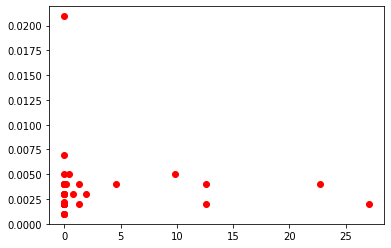

In [26]:
plt.plot(z6,t6,'ro')

Advantages:
*Can handle sparse gradients on noisy datasets.

*Works well on large datasets.

Disadvantages:

*Adam does not converge to an optimal solution in some areas (this is the motivation for AMSGrad).



In [27]:
def overlay_trajectory_quiver(ax,obj_func,trajectory, color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(xs[:-1], ys[:-1], zs[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1],zs[1:]-zs[:-1],color=color,arrow_length_ratio=0.3)
    
    return ax;

def overlay_trajectory(ax,obj_func,trajectory,label,color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.plot(xs,ys,zs, color, label=label)
    
    return ax;

    
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

def overlay_trajectory_quiver(ax,obj_func,trajectory, color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(xs[:-1], ys[:-1], zs[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1],zs[1:]-zs[:-1],color=color,arrow_length_ratio=0.3)
    
    return ax;

def overlay_trajectory(ax,obj_func,trajectory,label,color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.plot(xs,ys,zs, color, label=label)
    
    return ax;

    
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

<ipython-input-24-62720016536b>:5: UserWarning: Log scale: values of z <= 0 have been masked
  cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")


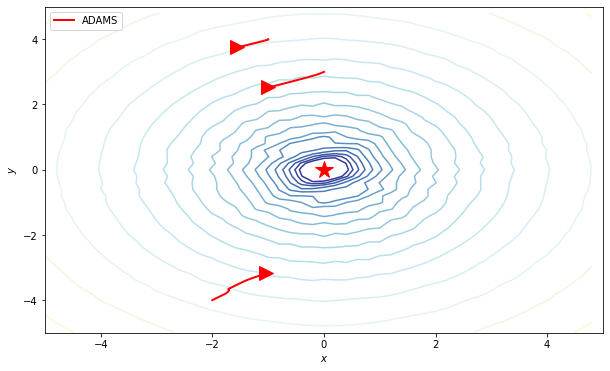

In [32]:
plt.close()
init1=np.array([0,3])
fig1, ax1=contour_f_2()

adam_trajectory1=adams(grad_f_2,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8)

overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')

plt.legend(loc=2)


init3=np.array([-1,4])

adam_trajectory3=adams(grad_f_2,init3,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8)

overlay_trajectory_contour_M(ax1,adam_trajectory3,'ADAMS', 'r')

init4=np.array([-2,-4])

adam_trajectory4=adams(grad_f_2,init4,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8)

overlay_trajectory_contour_M(ax1,adam_trajectory4,'ADAMS', 'r')

plt.show()